<a href="https://colab.research.google.com/github/23-01-2004/Weather-App-/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Define column names
columns = ['id', 'user', 'polarity', 'text']

# Load the dataset without headers and add column names
df = pd.read_csv('twitter_training.csv', names=columns, header=None)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Display the first few rows of the dataframe
print(df.head())

# Basic statistics about the dataset
print(df['polarity'].value_counts())

     id         user  polarity  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
polarity
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [8]:
# Function to clean tweet text
def clean_text(text):
    if isinstance(text, str):
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
        return ' '.join(filtered_text)
    else:
        return ""

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)


<ipython-input-10-b38a5f3a63bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='polarity', data=df, palette='viridis')


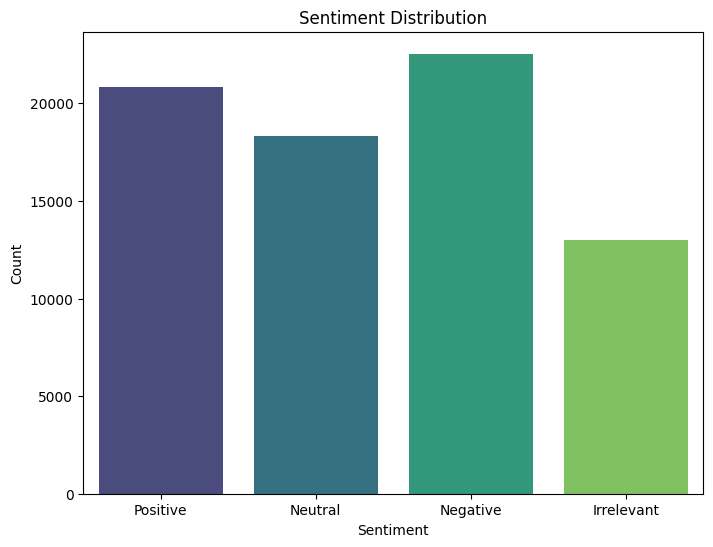

In [10]:
# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='polarity', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
# Generate word clouds for each sentiment
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(data))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

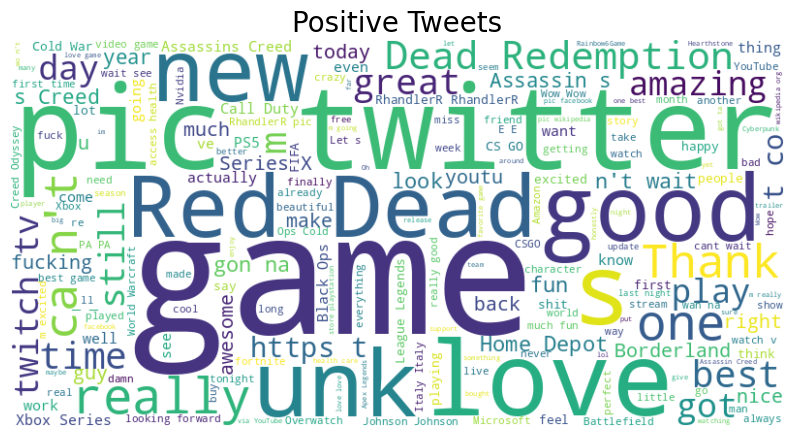

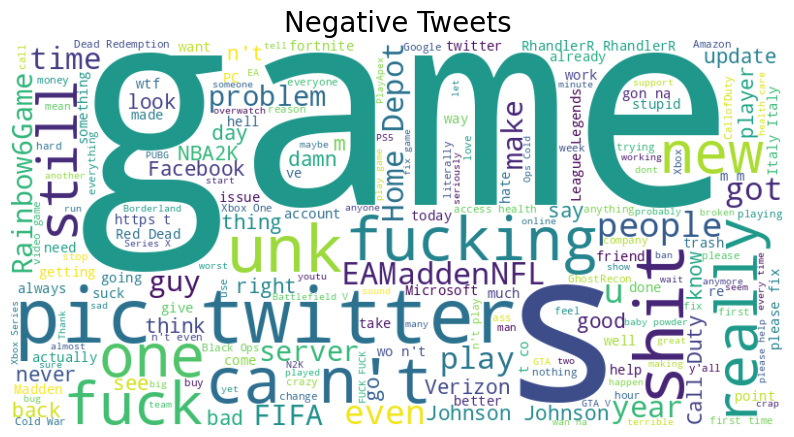

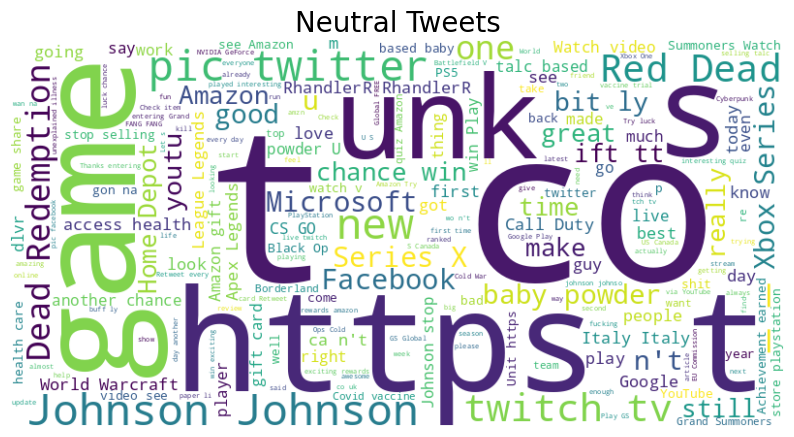

In [12]:
generate_wordcloud(df[df['polarity'] == 'Positive']['cleaned_text'], 'Positive Tweets')
generate_wordcloud(df[df['polarity'] == 'Negative']['cleaned_text'], 'Negative Tweets')
generate_wordcloud(df[df['polarity'] == 'Neutral']['cleaned_text'], 'Neutral Tweets')